In [2]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 14.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Preprocessing

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import time

In [46]:
# Load and scale the dataset

df =  pd.read_csv('/Users/eliasfirisa/Desktop/[HW6]_Practical_class_7 (1)/Preprocessed_Single_Cell_RNA_Seq_data.csv')

# Drop the non‐numeric index column ("Unnamed: 0")
#    After this, df has shape (M_genes, N_cells).
df_genes_by_cells = df.drop(columns=['Unnamed: 0'])
print("After dropping 'Unnamed: 0' (genes x cells):", df_genes_by_cells.shape)



After dropping 'Unnamed: 0' (genes x cells): (1000, 2100)


In [47]:
# Transpose so that rows become cells, columns become genes
#    Now each row is one cell's vector of M_genes expression values.
df_cells_by_genes = df_genes_by_cells.T
print("After transposing (cells × genes):", df_cells_by_genes.shape)

After transposing (cells × genes): (2100, 1000)


In [ ]:
# Convert the transposed DataFrame to a NumPy array
X = df_cells_by_genes.values
print("X.shape (cells × genes) =", X.shape)


X.shape (cells × genes) = (2100, 1000)


In [43]:
# Standardize each gene‐column (mean=0, std=1) across all cells
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)
print("X_scaled.shape =", X_scaled.shape)

X_scaled.shape = (2100, 1000)


Problem 1

In [29]:
PCA
# make pca to reduce the dimension of the data to 2D
pca2 = PCA(n_components= 2)
X_pca = pca2.fit_transform(X_scaled)# Apply 

In [30]:
# Check explained variance
explained = pca2.explained_variance_ratio_
print(f"Explained variance by PC1: {explained[0]:.3f}, PC2: {explained[1]:.3f}")
print(f"Cumulative (PC1+PC2): {explained[0] + explained[1]:.3f}")

Explained variance by PC1: 0.022, PC2: 0.021
Cumulative (PC1+PC2): 0.043


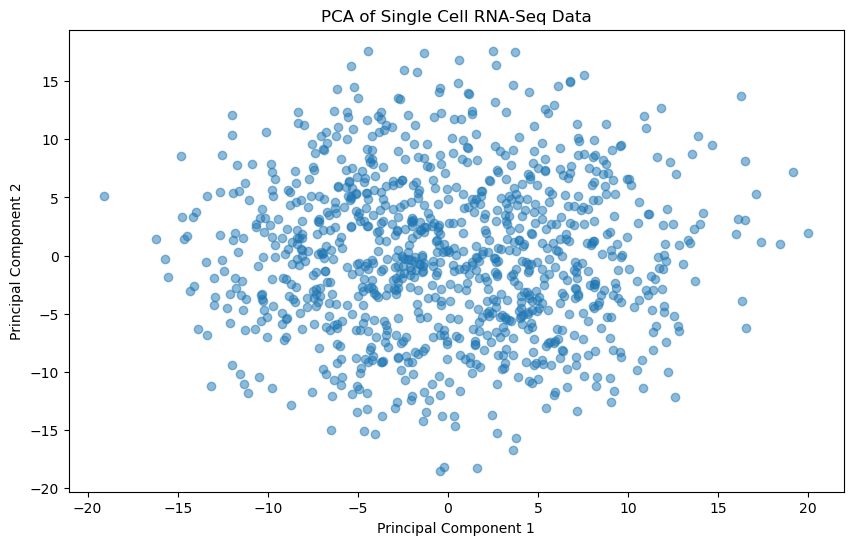

In [50]:
# PCA Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Single Cell RNA-Seq Data')
plt.show()


Problem 2 

In [51]:
# PCA
# make pca to reduce the dimension of the data to 3D
pca3 = PCA(n_components= 3)
X_pca = pca3.fit_transform(X_scaled)# Apply 


# Check explained variance
explained = pca3.explained_variance_ratio_

print(f"Explained variance by PC1: {explained[0]:.3f}, PC2: {explained[1]:.3f}, PC3: {explained[2]:.3f}")
print(f"Cumulative (PC1+PC2+PC3): {explained[0] + explained[1] + explained[2]:.3f}")




Explained variance by PC1: 0.022, PC2: 0.021, PC3: 0.020
Cumulative (PC1+PC2+PC3): 0.063
